# Data Exploration and Folder Structure creation

In [10]:
import torch
from collections import Counter
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import os
from glob import glob
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Data science tools
import numpy as np
import pandas as pd
import os

# Image manipulations
from PIL import Image

from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

In [11]:
ImagePATH = f"images/"

In [12]:
ImagePATH

'images/'

In [13]:
categories = glob(ImagePATH+"*")

In [14]:
print(categories)

['images/kayak', 'images/boats', 'images/gondola', 'images/sailboat', 'images/inflatable boat', 'images/paper boat', 'images/buoy', 'images/cruise ship', 'images/freight boat', 'images/ferry boat']


In [15]:
filedf = pd.DataFrame()
for cat in categories:
    files = glob(cat+"/*")
    tempdf = pd.DataFrame({'filepath':files,'category':cat.split("/")[-1]})
    filedf = pd.concat([filedf,tempdf])

In [16]:
filedf.head()

filepath category
0  images/kayak/kayak-person-water-sport-activity...    kayak
1  images/kayak/water-ocean-canoe-sea-summer-3359...    kayak
2  images/kayak/outdoor-healing-tranquil-lake-kay...    kayak
3  images/kayak/kayak-canoe-boat-kayaks-rafting-2...    kayak
4  images/kayak/water-kayak-pictogram-lake-river-...    kayak

In [7]:
gby_cnt = filedf.groupby("category").aggregate('count').rename(columns = {'filepath':'cnt'}).reset_index().sort_values(by='cnt',ascending=False)

In [8]:
px.bar(gby_cnt,x = 'category',y = 'cnt',color = 'category',title = 'Counts from Each Category')

In [9]:
!mkdir outputs

mkdir: cannot create directory ‘outputs’: File exists


In [10]:
gby_cnt.to_csv(f"outputs/category_counts.csv",index=None)

# Check some images from Dataset

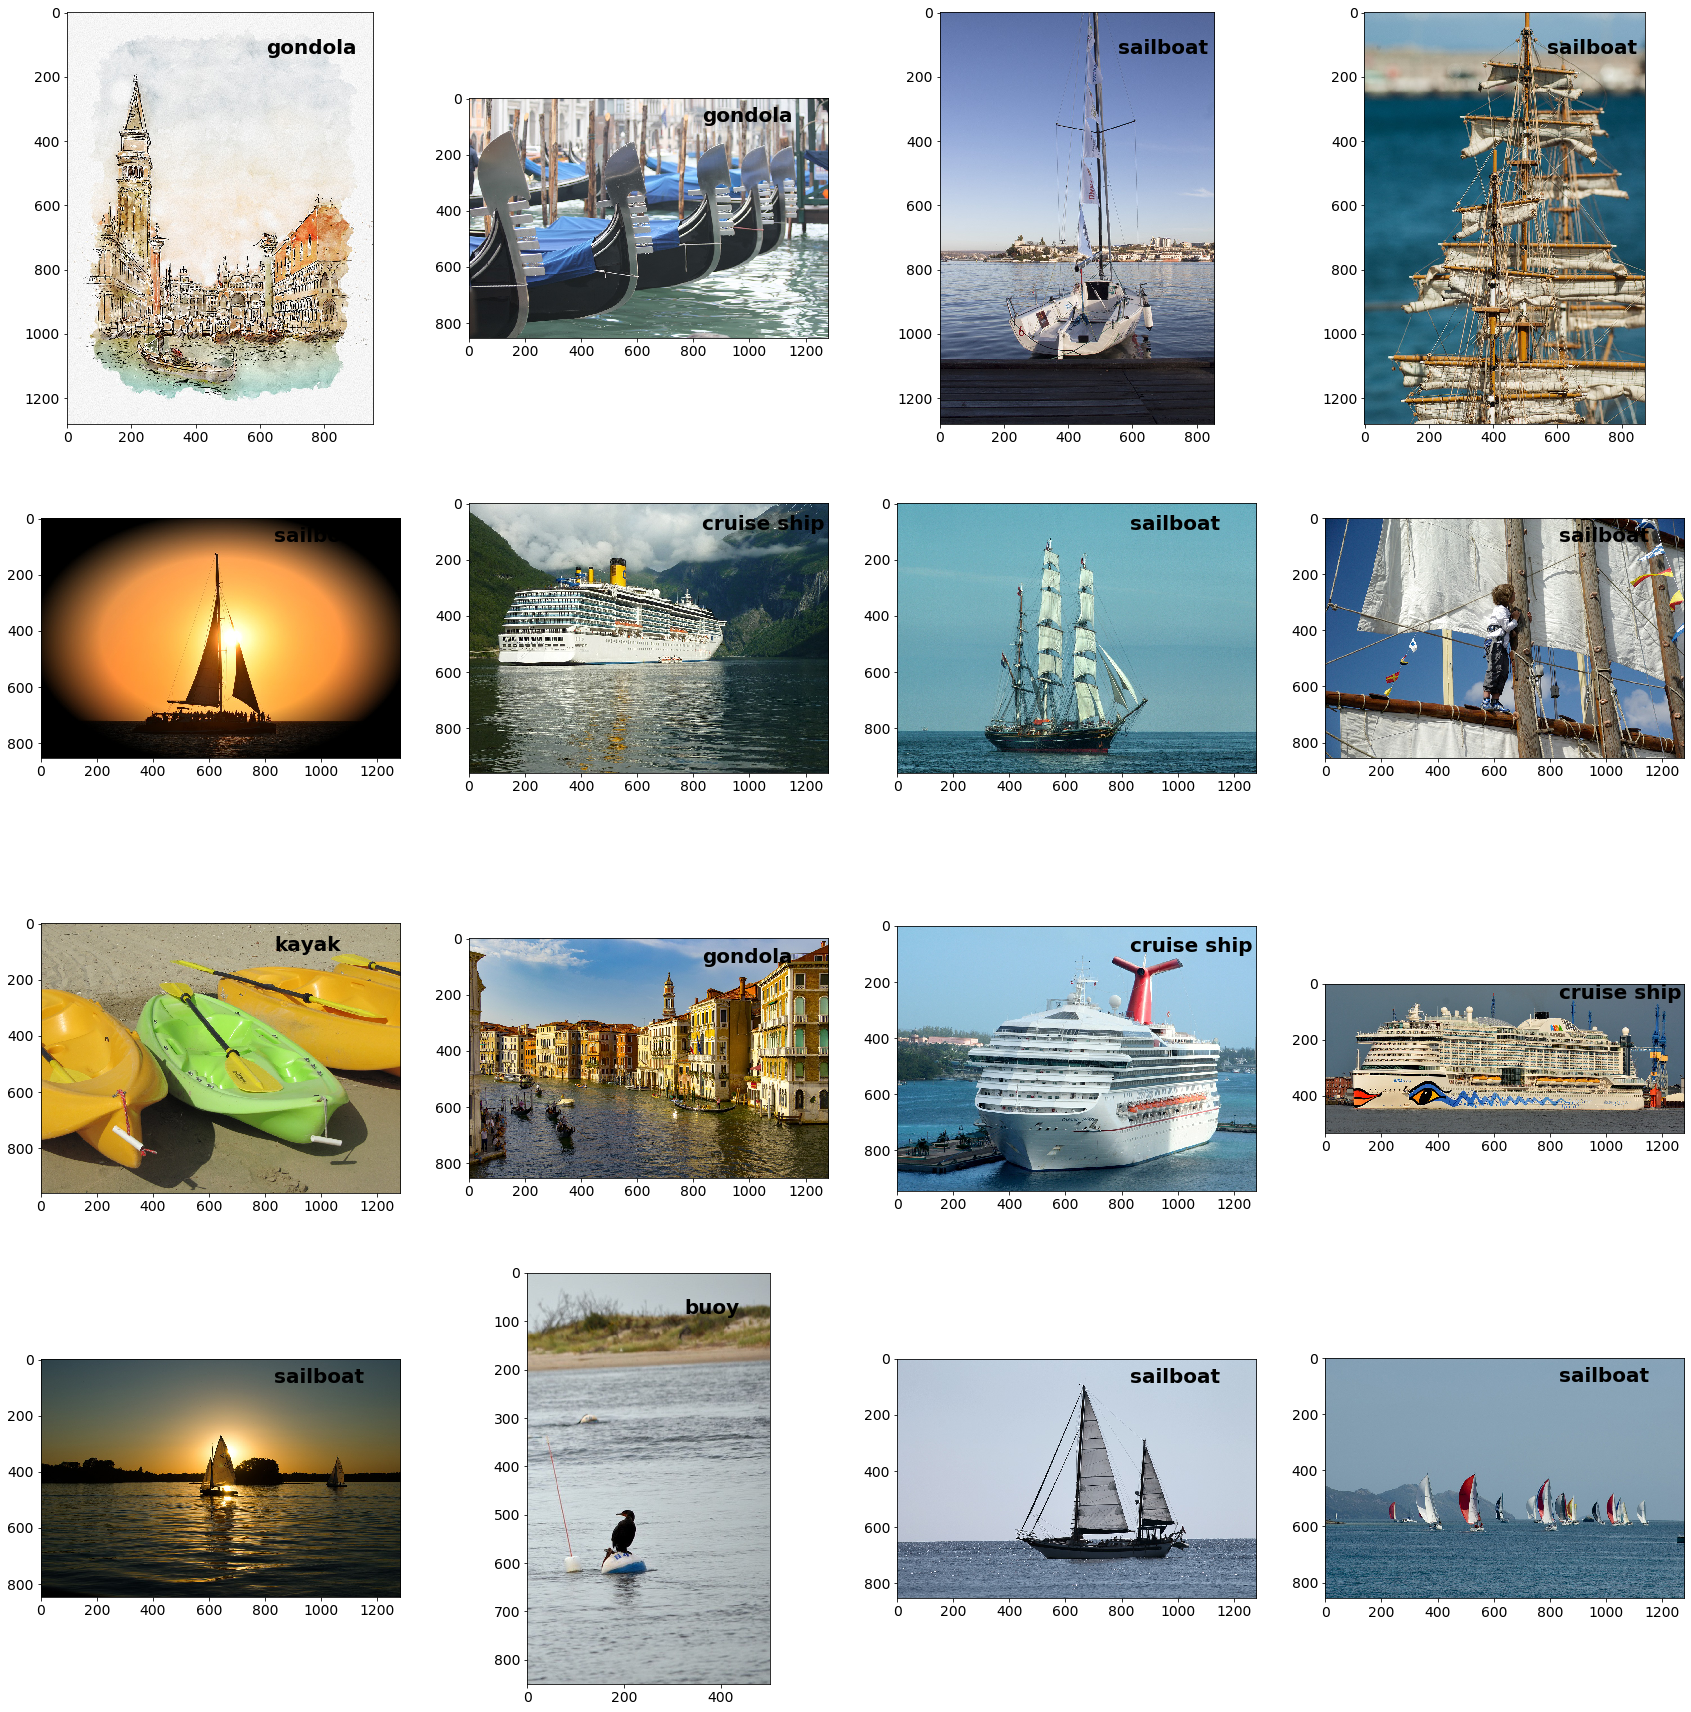

In [30]:
plt.figure(figsize=(24, 24))

for i in range(16):
    path = filedf.sample(1)['filepath'].values[0]
    category = path.split("/")[1]
    ex_img = Image.open(path)
    ax = plt.subplot(4, 4, i + 1)
    ax.annotate(category, xy=(0.65, 0.9), xycoords="axes fraction",weight='bold',size=20)
    ax.imshow(ex_img)

plt.tight_layout()

# Filtering for classes with low counts

In [11]:
focus_cats = gby_cnt[gby_cnt['cnt'] >=40]['category'].values

In [12]:
filedf  = filedf[filedf['category'].isin(focus_cats)]

In [13]:
filedf.category.value_counts()

sailboat       488
kayak          254
gondola        242
cruise ship    239
ferry boat      81
buoy            68
paper boat      40
Name: category, dtype: int64

In [14]:
X_train, X_test, _, _ = train_test_split(
        filedf, filedf['category'],stratify=filedf['category'], test_size=0.4)

X_test, X_val, _, _ = train_test_split(
        X_test, X_test['category'], stratify=X_test['category'], test_size=0.5)

In [15]:
X_train['type'] = 'train'
X_val['type'] = 'val'
X_test['type'] = 'test'

/home/rahul/anaconda3/envs/pyt/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
fulldf = pd.concat([X_train,X_test,X_val])

In [17]:
fulldf.type.value_counts()

train    847
val      283
test     282
Name: type, dtype: int64

In [18]:
fulldf.head()

filepath     category   type
198  images/sailboat/sailing-boat-boat-sailing-wind...     sailboat  train
18   images/paper boat/pareo-origami-boat-boat-pape...   paper boat  train
33   images/cruise ship/my-ship-cruise-porthole-cru...  cruise ship  train
16   images/kayak/lake-kayak-clouds-mirroring-boje-...        kayak  train
449  images/sailboat/pirate-ship-sea-moon-fantasy-o...     sailboat  train

# BaselineAccuracy

In [19]:
fulldf.category.value_counts()[0]/len(fulldf)

0.34560906515580736

# Creating train val test folders

In [20]:
!mkdir data
!rm -rf data/
!rm -rf data/train
!rm -rf data/test
!rm -rf data/val
!mkdir data/
!mkdir data/train
!mkdir data/test
!mkdir data/val

mkdir: cannot create directory ‘data’: File exists


In [21]:
fulldf.category.unique()

array(['sailboat', 'paper boat', 'cruise ship', 'kayak', 'gondola',
       'ferry boat', 'buoy'], dtype=object)

In [22]:
for cat in fulldf.category.unique():
    os.system(f"mkdir data/train/'{cat}'") 
    os.system(f"mkdir data/test/'{cat}'") 
    os.system(f"mkdir data/val/'{cat}'") 

In [23]:
fulldf.head()

filepath     category   type
198  images/sailboat/sailing-boat-boat-sailing-wind...     sailboat  train
18   images/paper boat/pareo-origami-boat-boat-pape...   paper boat  train
33   images/cruise ship/my-ship-cruise-porthole-cru...  cruise ship  train
16   images/kayak/lake-kayak-clouds-mirroring-boje-...        kayak  train
449  images/sailboat/pirate-ship-sea-moon-fantasy-o...     sailboat  train

In [24]:
for i,row in fulldf.iterrows():
    # Boat category
    cat = row['category']
    # section is train,val or test
    section = row['type']
    # input filepath to copy
    ipath = row['filepath']
    # output filepath to paste
    opath = ipath.replace(f"images/",f"data/{section}/")
    # running the cp command
    os.system(f"cp '{ipath}' '{opath}'")